# Словарь - `[dict]` - он же хэшированный массив пар ключ-значение

Словарь -- изменяемый итерируемый <u>хэшируемый</u> тип данных. 

## Cвойства

- Изменяемый
- Упорядочен по ключам
- Хранит любой тип данных в значении, но не в ключе

## Синтаксис: 
{key1 : value1, key2: value2, ... , keyN: valueN}

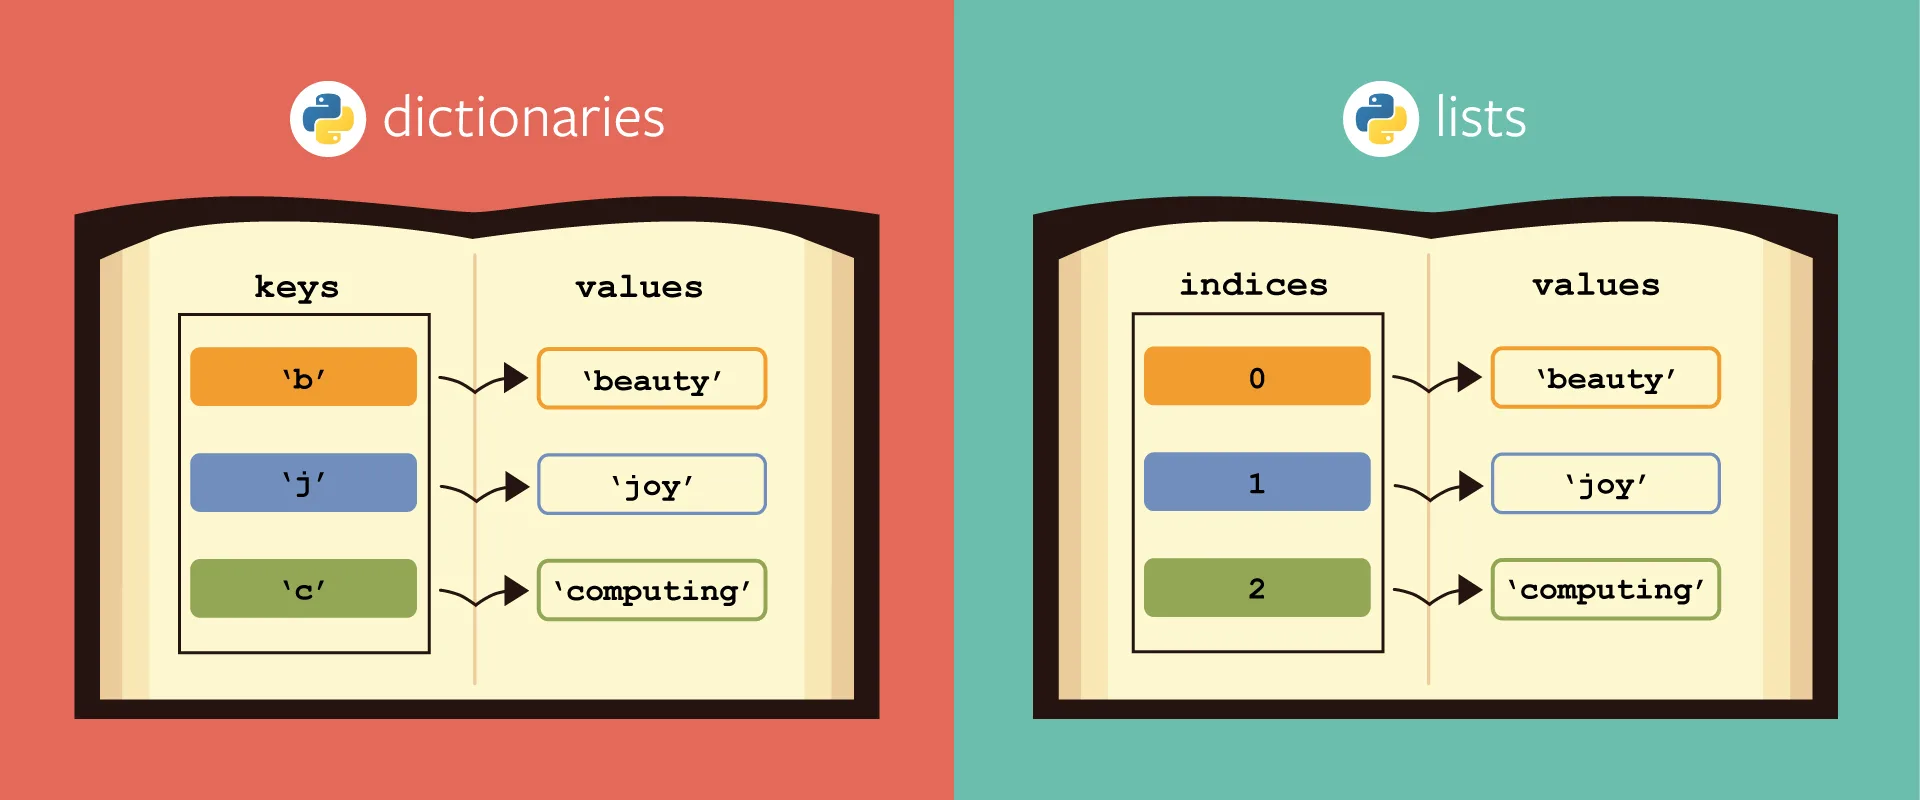

# Хэширование
- процесс преобразования из человеческого понимания представления строк и прочих структур в машинное понимание. Хэшированию подлежат только данные неизменяемого типа.

In [37]:
hash('Слово')

6459835403450673480

In [38]:
print(hash(2)) 
print(hash(2000)) 

2
2000


In [39]:
hash((23,4,6))

-693957205353252586

- изменяемый тип данных хэшированию <u>не подлежит</u>. Т.к. смысл хэш-функции получить конеченое число-идентификтор(хэш-число), а изменяемый объект можно изменить, поэтому значение постоянно бы менялось и найти такой хэш-идентификтор не представлялось бы возможным

In [40]:
# hash([23,4,6])

# Упорядочен по ключам

Т.к. мы получаем конечное хэш-значение, то порядок будет задаваться в соответствии с его значением(хэш-кода)

In [41]:
print(hash('a'), hash('b'), hash('ab'), hash('aa'))

3581688501499774240 4949427726879758054 1251895107255787109 -7721190363530274373


In [42]:
print(hash(1), hash(2), hash(3), hash(4))

1 2 3 4


# Синтаксис на практике

Что конкретно подвергается хэшировнию? - Ключ. Т.е. для каждого словаря создается абсолютно уникальный ключ и чтобы системе было проще и быстрее его найти, мы используем хэширование ключа. Соответственно ключом должно быть данное неизменяемого типа, а значение по ключу может быть любым 

In [43]:
dct = {'key1': 0} # Пустой словарь
dct2 = {
    'key1': [2,3,4,5], 
    'key2': (5,6,7,8)
    }

dct3 = {
    23: "Число 23",
    2.5: "Флоат число 2.5",
    'строка': 'Тут и так все понятно',
    True: [2,3,4,5],
    (2,3): 23,
    # frozenset([1,2,3]): 23
    }

Исходя из правила что каждый ключ хэшируется для словаря, можем сделать что ключ в слова будет всегда один(без дублей)

# Работа со словарем

Любой вывод значения, происходит ВСЕГДА по <u>ключу</u>

In [44]:
print(dct2['key1'])
# print(dct2[:]) # срезы не поддерживаются
# print(dct2['key44']) # Если мы обращаемся к словарю в котором нет такого ключа, то получаем ошибку

[2, 3, 4, 5]


Присвоение или изменение значения в словаре

In [45]:
print(f'{dct=}')
dct['key_2523425'] = "Стартовое значение" # Создание ключ-значения
print(f'{dct=}')
dct['key_2523425'] = "Новое значение" # Изменение значения по ключу(т.к. оно уже было\есть в словаре)
print(f'{dct=}')

dct={'key1': 0}
dct={'key1': 0, 'key_2523425': 'Стартовое значение'}
dct={'key1': 0, 'key_2523425': 'Новое значение'}


# Методы словаря

`[dict].update([dict2])` - Передает значение из `[dict2]` в `[dict]`. Если ключ-значение уже есть в `[dict]`, то его значение менятеся на значение из другого словаря `[dict2]`

In [46]:
print(dct.update(dct2)) # Значение не возвращает, но действие производит
print(dct)


None
{'key1': [2, 3, 4, 5], 'key_2523425': 'Новое значение', 'key2': (5, 6, 7, 8)}


`[dict].pop(<key>)` - Выдергивает ключ-значение, но нам он выдает только значение 

In [47]:
print(dct)

s = dct.pop('key1')
print(s)

print(dct)

{'key1': [2, 3, 4, 5], 'key_2523425': 'Новое значение', 'key2': (5, 6, 7, 8)}
[2, 3, 4, 5]
{'key_2523425': 'Новое значение', 'key2': (5, 6, 7, 8)}


`[dict].popitem()` - Выдергивает ключ-значение из словаря, начиная с последнего ключа 

In [48]:
print(dct)
print(dct.popitem())
print(dct)

{'key_2523425': 'Новое значение', 'key2': (5, 6, 7, 8)}
('key2', (5, 6, 7, 8))
{'key_2523425': 'Новое значение'}


`[dict].get(<key>, *<answer> по умол. None))` - Выдает элемент из словаря по ключу `<key>`, если такого элемента нет, то возвращает `None` 

In [49]:
print(dct.get('key_2523425'))
print(dct.get('key_2'))
print(dct.get('key_2', "Не нашел значение")) # Можно поставить свой вариант ответа на ненайденное значение

Новое значение
None
Не нашел значение


`[dict].setdefault(<ключ>, *<значение> по умол. None)` - Задает базовое значение для внесенного ключа, если его не было в словаре `[dict]` ранее

In [50]:
print(dct)
print(dct.setdefault('key_2'))
print(dct)
print(dct.setdefault('key_3', ['Какое', 'либо','значение']))
print(dct)

{'key_2523425': 'Новое значение'}
None
{'key_2523425': 'Новое значение', 'key_2': None}
['Какое', 'либо', 'значение']
{'key_2523425': 'Новое значение', 'key_2': None, 'key_3': ['Какое', 'либо', 'значение']}


`[dict].clear()` - очищает весь словарь

In [51]:
# dct.clear()
print(dct)

{'key_2523425': 'Новое значение', 'key_2': None, 'key_3': ['Какое', 'либо', 'значение']}


`[dict].values()` - Выводит все значение, словаря

In [52]:
print(dct)
print(dct.values())
print(list(dct.values()))

{'key_2523425': 'Новое значение', 'key_2': None, 'key_3': ['Какое', 'либо', 'значение']}
dict_values(['Новое значение', None, ['Какое', 'либо', 'значение']])
['Новое значение', None, ['Какое', 'либо', 'значение']]


`[dict].keys()` - Выводит все КЛЮЧИ словаря

In [53]:
print(dct)
print(dct.keys())
print(list(dct.keys()))

{'key_2523425': 'Новое значение', 'key_2': None, 'key_3': ['Какое', 'либо', 'значение']}
dict_keys(['key_2523425', 'key_2', 'key_3'])
['key_2523425', 'key_2', 'key_3']


`[dict].copy()` - работает точно также как и в списках

In [18]:
...

Ellipsis

`[dict].items()` - выводит все объекты словаря, в привычном ему виде. Ключ-значение. `[(ключ1,значение1), (ключ2,значение2), ... ]`

In [57]:
print(dct)
print(dct.items())
print(*list(dct.items()), sep='\n')

{'key_2523425': 'Новое значение', 'key_2': None, 'key_3': ['Какое', 'либо', 'значение']}
dict_items([('key_2523425', 'Новое значение'), ('key_2', None), ('key_3', ['Какое', 'либо', 'значение'])])
('key_2523425', 'Новое значение')
('key_2', None)
('key_3', ['Какое', 'либо', 'значение'])


In [58]:
slovar = {
    "Яблоко":["Красный","Зеленый","Желтый"],
    "Банан": ["Желтый","Оранжевый"],
    "Киви":["Зеленый","Черный"]
    }
slovar.setdefault("Дыня")  # Вопрос: можем ли мы изменить одно значение в ключе, не задавая ключю полностью новое? 

In [59]:
slovar

{'Яблоко': ['Красный', 'Зеленый', 'Желтый'],
 'Банан': ['Желтый', 'Оранжевый'],
 'Киви': ['Зеленый', 'Черный'],
 'Дыня': None}